# Welcome to Covid World
by 
[Ravi Satvik]
[Omkar Chwan]
[Dev Patel]
[Smit Gandhi]  

Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 through data analysis and projections.

Coronavirus Case Data is provided by Johns Hopkins University

<font face = "Verdana" size ="500">
    <center><img src='https://media.giphy.com/media/dVuyBgq2z5gVBkFtDc/giphy.gif'>
    

In [444]:
#some necessary library which we gone use
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

### [ 1.0 ] World time-series data

In [445]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [446]:
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2448,2475,2482,2488,2494,2501,2512,2524,2526,2529,2533,2550,2553,2554,2557,2560,2567,2570,2571,2572,2572,2575,2575,2576,2579,2586,2586,2591,2594,2594,2603,2617,2620,2626,2631,2637,2648,2659,2668,2683
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,185336,187309,189326,191203,193029,194548,196812,198554,200382,202378,203669,205652,207436,209304,211602,213791,215984,218061,219912,221391,223638,225976,228044,230076,232038,233549,234748,236462,238248,240065,242353,244645,246893,248482,251288,253922,256461,259133,262017,264395
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2310,2342,2363,2375,2411,2444,2473,2545,2586,2627,2667,2729,2771,2836,2908,2969,3037,3126,3217,3278,3418,3516,3612,3703,3816,3900,3969,4033,4115,4247,4357,4531,4620,4697,4798,4881,4975,5047,5133,5233
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,79002,79557,80090,80687,81341,82011,82421,82655,82897,83

In [447]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [448]:
deaths_reported

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2444,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451,2454,2454,2457,2459,2460,2460,2462,2462,2462,2463,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484,2489,2495,2496,2497,2508,2512,2512,2516,2521
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1816,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002,2018,2030,2045,2060,2077,2092,2106,2122,2133,2137,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235,2241,2247,2256,2265,2274,2283,2291,2297,2304
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2987,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028,3031,3034,3036,3040,3045,3048,3051,3053,3055,3057,3061,3066,3069,3071,3074,3077,3080,3084,3089,3093,3096,3099,3102,3105,3108,3112,3116,3119,3123
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,110,110,112,112,112,112,112,112,112,112,112,112,112,113,113,113,113,113,113,113,113,113,113,114,114,114,115,115,115,115,115,115,116,117,117,117,117,119,120,120
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,508,510,510,511,511,512,514,515,516,516,517,519,520,521,521,522,522,522,524,526,527,530,530,532,532,532,533,533,534,536,537,538,538,540,542,543,547,547,549,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2058,2063,2078,2091,2110,2127,2140,2157,2170,2193,2211,2228,2255,2268,2293,2314,2343,2358,2379,2406,2427,2458,2478,2501,2521,2537,2557,2581,2599,2614,2627,2645,2661,2681,2706,2716,2735,2753,2781,2812
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,634,640,643,645,648,650,651,653,654,661,667,679,683,689,698,707,713,723,733,737,751,771,785,800,810,820,832,851,863,882,888,906,916,932,946,955,976,986,1004,1022
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1098,1104,1108,1109,1113,1116,1124,1132,1137,1140,1148,1149,1153,1158,1164,1167,1170,1175,1178,1178,1179,1182,1185,1187,1191,1194,1198,1200,1200,1202,1208,1212,1215,1215,1220,1222,1224,1224,1225,1226


In [449]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [450]:
recovered_cases 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49344,49347,49359,49362,49362,49369,49378,49402,49409,49499,49499,49499,49471,49477,49481,49499,49536,49664,49681,49681,49737,49743,49752,49802,49937,49994,49994,50013,50666,51473,51550,51788,51798,51802,51885,51902,51928,51940,51956,51961
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,70413,71173,72076,72853,73610,74352,75190,75887,76784,77498,78259,79131,79821,80483,81061,81810,82554,83264,83954,84625,85147,85846,86497,87193,87760,88349,88899,89456,90024,90617,91271,91875,92500,93173,93842,94431,95035,95600,96129,96672
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,78234,78377,78524,78672,78824,78946,79064,79187,79319,79428,79556,79672,79783,79887,79994,80103,80219,80347,80455,80566,80659,80887,80981,81065,81065,81160,81242,81316,81349,81442,81538,81632,81729,81813,81896,81994,82096,82192,82289,82392
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10475,10501,10560,10564,10584,10599,10626,10661,10685,10708,10708,10754,10775,10796,10795,10861,10883,10904,10925,10952,10973,11014,11050,11082,11111,11149,11172,11204,11244,11276,11315,11365,11401,11428,11474,11523,11570,11616,11692,11732
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19400,19410,19509,19553,19624,19640,19647,19657,19677,19761,19827,19835,19848,19850,19948,19971,20028,20032,20065,20068,20073,20090,20099,20172,20190,20250,20269,20289,20380,20446,20493,20508,20867,20871,20879,21452,21489,21545,21557,21589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,...,1876,1898,1898,1920,1920,1920,1920,1920,2004,2004,2048,2086,2086,2086,2115,2158,2198,2198,2198,2198,2198,2233,2246,2265,2265,2265,2308,2308,2308,2359,2359,2359,2383,2383,2383,2416,2422,2429,2429,2429
255,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,167744,168763,169915,171318,172588,173732,175178,176507,178121,179810,181452,183003,184487,186278,187634,189759,191839,193578,195372,196678,198431,199965,201675,203340,205289,206914,208676,210340,211521,213590,215429,217224,217224,220418,222007,223249,224552,226090,227988,229876
256,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1435,1435,1435,1435,1439,1442,1446,1447,1451,1452,1464,1469,1472,1491,1500,1507,1508,1520,1529,1530,1534,1546,1566,1577,1580,1588,1590,1606,1657,1667,1676,1682,1691,1715,1738,1772,1822,1886,1946,1987
257,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,75087,75563,76299,76498,77081,77609,77943,78721,79162,79556,80027,80462,80599,81756,82375,82432,82457,82527,82714,83110,83258,83319,83478,83617,83895,8

In [451]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-08-2021.csv')

In [452]:
latest_data1 = latest_data.dropna(subset=["Lat","Long_"])
latest_data1.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-04-09 04:21:13,33.93911,67.709953,56943,2516,51956.0,2471.0,Afghanistan,146.276462,4.418454
1,NaN,NaN,NaN,Albania,2021-04-09 04:21:13,41.15330,20.168300,127509,2297,96129.0,29083.0,Albania,4430.780457,1.801441
2,NaN,NaN,NaN,Algeria,2021-04-09 04:21:13,28.03390,1.659600,118116,3119,82289.0,32708.0,Algeria,269.357333,2.640624
3,NaN,NaN,NaN,Andorra,2021-04-09 04:21:13,42.50630,1.521800,12409,120,11692.0,597.0,Andorra,16060.311914,0.967040
4,NaN,NaN,NaN,Angola,2021-04-09 04:21:13,-11.20270,17.873900,23108,549,21557.0,1002.0,Angola,70.309169,2.375801


In [453]:
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
map = folium.Map( zoom_start=4,tiles='Stamenterrain')
for lat, lon, value, name in zip(latest_data1['Lat'], latest_data1['Long_'], latest_data1['Confirmed'], latest_data1['Combined_Key']):
    folium.CircleMarker([lat, lon], radius=value*(1/400000), popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<strong>Confirmed</strong>: ' + str(value) + ' '),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

In [454]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/31/21', '4/1/21', '4/2/21', '4/3/21', '4/4/21', '4/5/21', '4/6/21',
       '4/7/21', '4/8/21', '4/9/21'],
      dtype='object', length=448)

In [455]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [456]:
confirmed.keys()

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '3/31/21', '4/1/21', '4/2/21', '4/3/21', '4/4/21', '4/5/21', '4/6/21',
       '4/7/21', '4/8/21', '4/9/21'],
      dtype='object', length=444)

In [457]:
pip install pycountry

In [458]:
pip install geopandas

In [459]:
pip install plotly_express

In [460]:
import pycountry
import plotly.express as px
import pandas as pd
# Starting the required libraries
import numpy as np
import geopandas as gpd
import pandas as pd
from functools import reduce

In [461]:
id_list = confirmed_cases.columns.to_list()[:4]
vars_list = confirmed_cases.columns.to_list()[4:]
confirmed_tidy = pd.melt(confirmed_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Confirmed')
deaths_tidy = pd.melt(deaths_reported, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Deaths')
recovered_tidy = pd.melt(recovered_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='recovered')
#  Merging the three dataframes into one
data_frames = [confirmed_tidy, deaths_tidy, recovered_tidy]          
df_corona = reduce(lambda left, right: pd.merge(left, right, on = id_list+['Date'], how='outer'), data_frames)

id_vars = df_corona.columns[:5]
data_type = ['Confirmed', 'Deaths', 'recovered']
df_corona = pd.melt(df_corona, id_vars=id_vars,value_vars=data_type, var_name='type', value_name='Count')
df_corona['Date'] = pd.to_datetime(df_corona['Date'],format='%m/%d/%y', errors='raise')

In [462]:
corona_sums = df_corona.groupby(['type', 'Date'],as_index=False).agg({'Count':'sum'})

In [463]:
import plotly_express as px
def plot_timeseries(df):
    fig = px.line(df, x='Date', y='Count', color='type',\
             template='plotly_dark')

    fig.update_layout(legend_orientation="h")
    return(fig)

fig = plot_timeseries(corona_sums)
fig.show()

### [ 2.0 ] visualization of Covid-19 for world

In [464]:
# Range of date
dates = confirmed.keys()

# Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# Confirmed
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

# Death
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []

# Recovered
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [465]:
# Fill with the dataset
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())


In [466]:
confirmed_sum

134691380

In [467]:
death_sum

2915400

In [468]:
recovered_sum

76508889

In [469]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [470]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [471]:
# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [472]:
# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [ ]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [474]:
confirmed_by_country = []
death_by_country = [] 
active_by_country = []
recovery_by_country = []
mortality_rate_by_country = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_country.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, confirmed_by_country), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    confirmed_by_country[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    death_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    recovery_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    active_by_country.append(confirmed_by_country[i] - death_by_country[i] - recovery_by_country[i])
    mortality_rate_by_country.append(death_by_country[i]/confirmed_by_country[i])

#### [ 2.1 ] Covid-19 Condition by all Country

In [475]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': confirmed_by_country,
                          'Number of Deaths': death_by_country, 'Number of Recoveries' : recovery_by_country, 
                          'Number of Active Cases' : active_by_country,
                          'Mortality Rate': mortality_rate_by_country})
# number of cases per country/region

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,31002264,560116,0.000000,30442148.000000,0.018067
1,Brazil,13279857,345025,11668734.000000,1266098.000000,0.025981
2,India,13060542,167642,11913292.000000,979608.000000,0.012836
3,France,5000155,98196,312540.000000,4589419.000000,0.019639
4,Russia,4563026,100158,4190701.000000,272167.000000,0.021950
5,United Kingdom,4384954,127224,13435.000000,4244295.000000,0.029014
6,Italy,3717602,112861,3060411.000000,544330.000000,0.030359
7,Turkey,3689866,33201,3232892.000000,423773.000000,0.008998
8,Spain,3336637,76179,150376.000000,3110082.000000,0.022831
9,Germany,2966789,78049,2640300.000000,248440.000000,0.026308


In [476]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [477]:
confirmed_by_province = []
country_by_province = [] 
death_by_province = [] 
recovery_by_province = []
mortality_rate_by_province = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_province.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, confirmed_by_province), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    confirmed_by_province[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    country_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    death_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    recovery_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    mortality_rate_by_province.append(death_by_province[i]/confirmed_by_province[i])

#### [ 2.2 ] Covid-19 Condition by state of countries

In [478]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': country_by_province, 'Number of Confirmed Cases': confirmed_by_province,
                          'Number of Deaths': death_by_province, 'Number of Recoveries' : recovery_by_province,
                          'Mortality Rate': mortality_rate_by_province})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,England,United Kingdom,3821151,111710,0.000000,0.029235
1,California,US,3690031,60129,0.000000,0.016295
2,Maharashtra,India,3229547,57028,2649757.000000,0.017658
3,Texas,US,2819600,49017,0.000000,0.017384
4,Sao Paulo,Brazil,2597366,80742,2218618.000000,0.031086
5,Florida,US,2104686,33906,0.000000,0.016110
6,New York,US,1933807,50898,0.000000,0.026320
7,Illinois,US,1269078,23740,0.000000,0.018706
8,Minas Gerais,Brazil,1192050,26795,1073225.000000,0.022478
9,Kerala,India,1148947,4728,1110283.000000,0.004115


In [479]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
confirmed_by_province = list(confirmed_by_province)

for i in nan_indices:
    unique_provinces.pop(i)
    confirmed_by_province.pop(i)

#### [ 2.3 ] India Covid Condition with all Countries

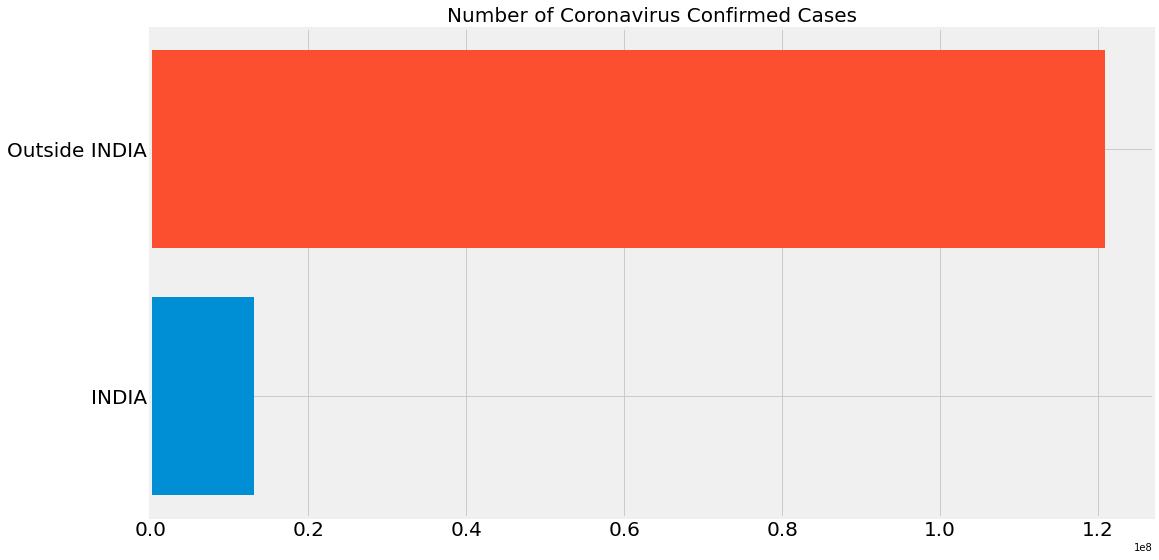

In [480]:
India_confirmed = latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_India_confirmed = np.sum(confirmed_by_country) - India_confirmed
plt.figure(figsize=(16, 9))
plt.barh('INDIA', India_confirmed)
plt.barh('Outside INDIA', outside_India_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [481]:
print('Outside India: {} cases'.format(outside_India_confirmed))
print('INDIA: {} cases'.format(India_confirmed))
print('Total: {} cases'.format(India_confirmed+outside_India_confirmed))

Outside India: 120882793 cases
INDIA: 13060542 cases
Total: 133943335 cases


#### [ 2.4 ] Considering 10 Countries

In [482]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(confirmed_by_country[10:])

for i in range(len(confirmed_by_country[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(confirmed_by_country[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [483]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

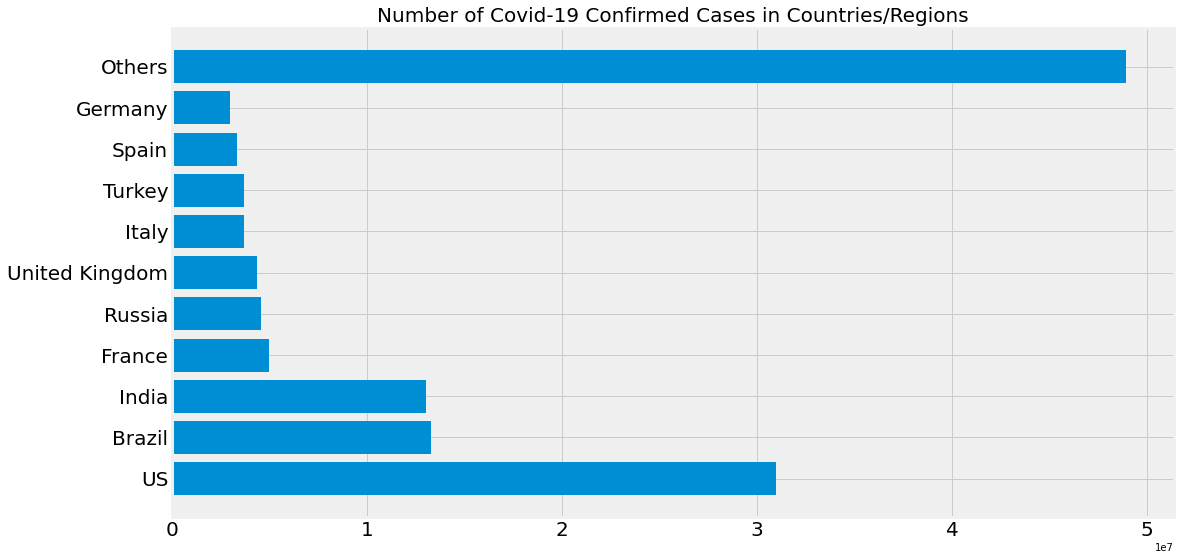

In [484]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [485]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(12,12))
    plt.title(title, size=20)
    plt.pie(y, colors=c, autopct='%1.1f%%')
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

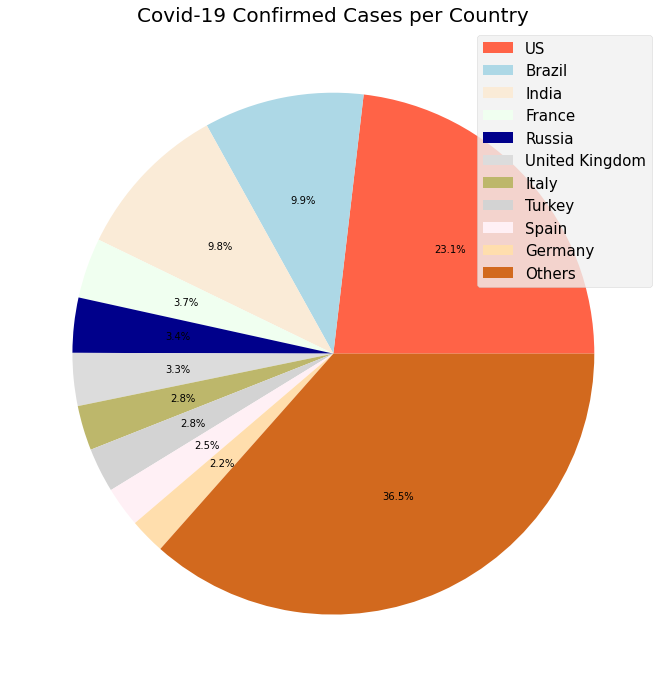

In [486]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [487]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the others category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(confirmed_by_province[10:])

for i in range(len(confirmed_by_province[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(confirmed_by_province[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

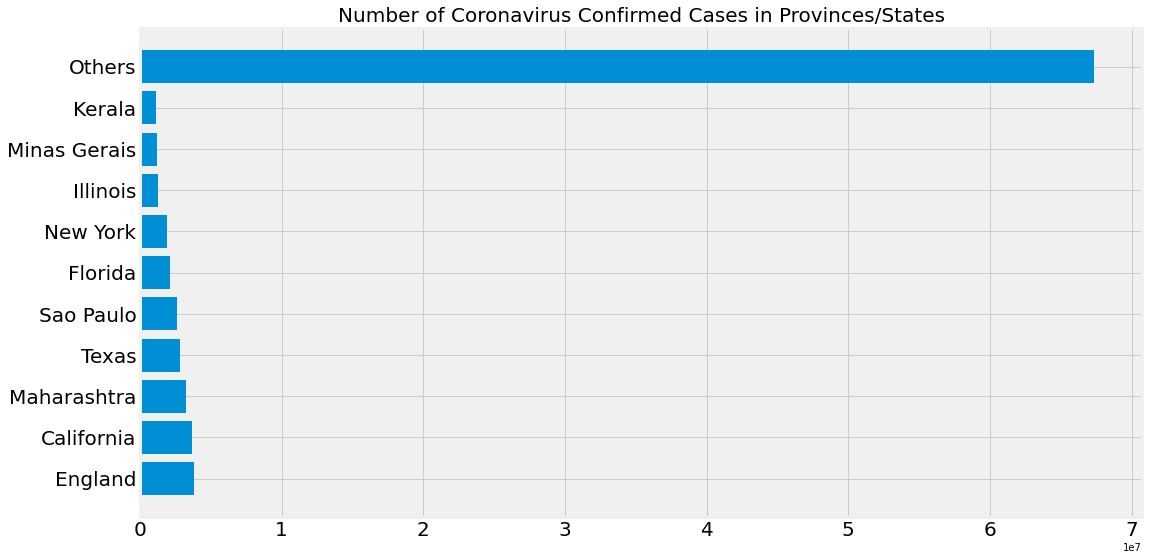

In [488]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')

In [489]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 

    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

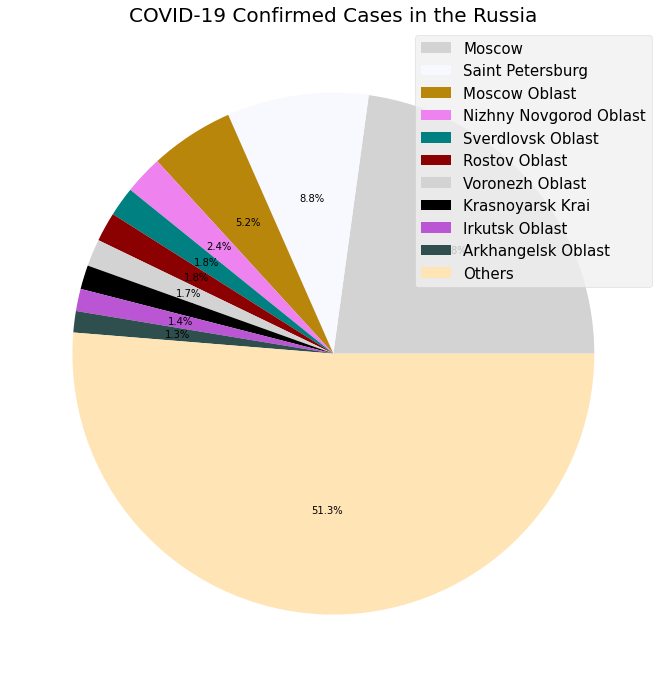

In [490]:
plot_pie_country_with_regions('Russia', 'COVID-19 Confirmed Cases in the Russia')

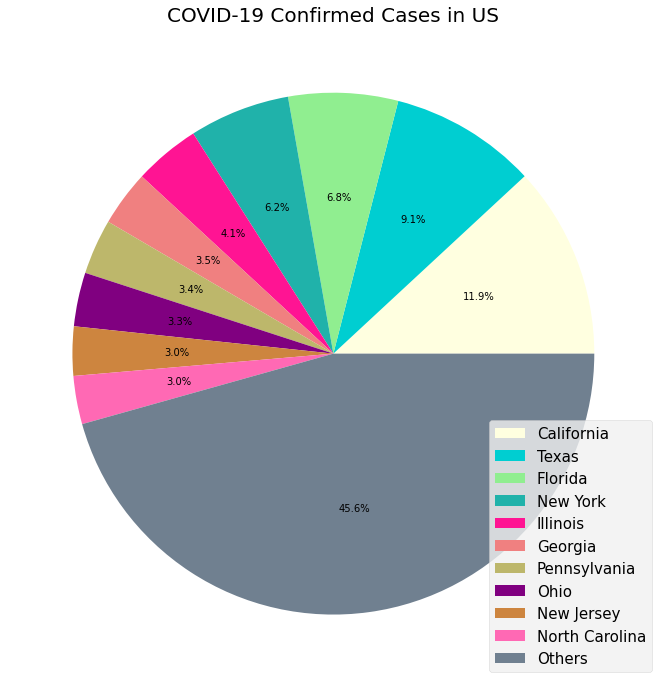

In [491]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in US')

### [ 3.0 ] Predicting the future Covid-19

In [492]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [493]:
days_in_future = 100
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-100]

In [494]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

#### [ 3.1 ] by using polynomial regression

In [495]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False) 
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_1_22, total_deaths, test_size=0.25, shuffle=False) 
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22, total_recovered, test_size=0.25, shuffle=False) 

In [496]:
# transform data for polynomial regression
poly = PolynomialFeatures(degree=2)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
c_poly_future_forecast = poly.fit_transform(future_forecast)

poly = PolynomialFeatures(degree=2)
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)
d_poly_future_forecast = poly.fit_transform(future_forecast)

poly = PolynomialFeatures(degree=2)
poly_X_train_recovered = poly.fit_transform(X_train_recovered)
poly_X_test_recovered = poly.fit_transform(X_test_recovered)
r_poly_future_forecast = poly.fit_transform(future_forecast)

In [497]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
c_test_linear_pred = linear_model.predict(poly_X_test_confirmed)
c_linear_pred = linear_model.predict(c_poly_future_forecast)
print('MAE:', mean_absolute_error(c_test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(c_test_linear_pred, y_test_confirmed))

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_death, y_train_death)
d_test_linear_pred = linear_model.predict(poly_X_test_death)
d_linear_pred = linear_model.predict(d_poly_future_forecast)
print('MAE:', mean_absolute_error(d_test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(d_test_linear_pred, y_test_death))

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_recovered, y_train_recovered)
r_test_linear_pred = linear_model.predict(poly_X_test_recovered)
r_linear_pred = linear_model.predict(r_poly_future_forecast)
print('MAE:', mean_absolute_error(r_test_linear_pred, y_test_recovered))
print('MSE:',mean_squared_error(r_test_linear_pred, y_test_recovered))
#4--1062327517932148.9
#3--220060858696333.78
#2**36212697702295.13
#1--1779809873591267.8

MAE: 5046923.372018218
MSE: 31653961878460.727
MAE: 235508.13902059002
MSE: 60989438341.4179
MAE: 7549312.321004664
MSE: 72068046796835.55


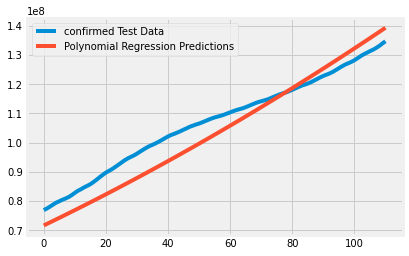

In [498]:
plt.plot(y_test_confirmed)
plt.plot(c_test_linear_pred)
plt.legend(['confirmed Test Data', 'Polynomial Regression Predictions'])


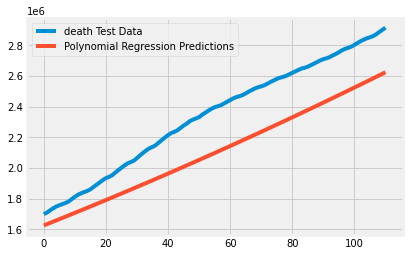

In [499]:
plt.plot(y_test_death)
plt.plot(d_test_linear_pred)
plt.legend(['death Test Data', 'Polynomial Regression Predictions'])


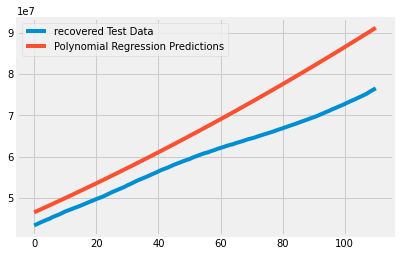

In [500]:
plt.plot(y_test_recovered)
plt.plot(r_test_linear_pred)
plt.legend(['recovered Test Data', 'Polynomial Regression Predictions'])

#### [ 3.2 ] by using svm prediction

In [501]:
c_y = y_train_confirmed.ravel()
y_train_confirmed = np.array(c_y).astype(int)

d_y = y_train_death.ravel()
y_train_death = np.array(d_y).astype(int)

r_y = y_train_recovered.ravel()
y_train_recovered = np.array(r_y).astype(int)

In [502]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
c_svm_pred = svm_confirmed.predict(future_forecast)

svm_death = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_death.fit(X_train_death, y_train_death)
d_svm_pred = svm_death.predict(future_forecast)

svm_recovered = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_recovered.fit(X_train_recovered, y_train_recovered)
r_svm_pred = svm_recovered.predict(future_forecast)

MAE: 15331717.08995197
MSE: 433822257807794.9


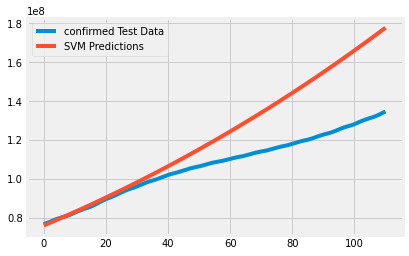

In [503]:
c_svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(c_svm_test_pred)
plt.legend(['confirmed Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(c_svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(c_svm_test_pred, y_test_confirmed))
#4--3400463834187033.5
#3--383840912143933.8
#2--7091798734398402.0
#1--9094024709454228.0

MAE: 119906177.04417019
MSE: 1.522964943264194e+16


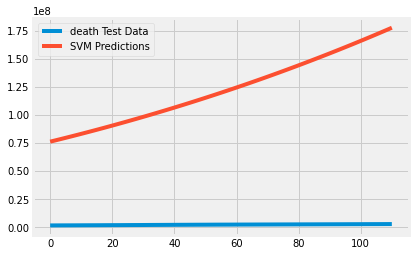

In [504]:
d_svm_test_pred = svm_confirmed.predict(X_test_death)
plt.plot(y_test_death)
plt.plot(d_svm_test_pred)
plt.legend(['death Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(d_svm_test_pred, y_test_death))
print('MSE:',mean_squared_error(d_svm_test_pred, y_test_death))

MAE: 62163602.99912512
MSE: 4279834281174549.0


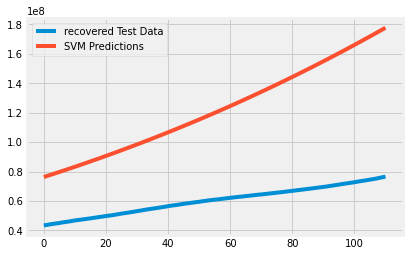

In [505]:
r_svm_test_pred = svm_confirmed.predict(X_test_recovered)
plt.plot(y_test_recovered)
plt.plot(r_svm_test_pred)
plt.legend(['recovered Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(r_svm_test_pred, y_test_recovered))
print('MSE:',mean_squared_error(r_svm_test_pred, y_test_recovered))

#### [ 3.3 ] Visualization of death, recovery, confirm 

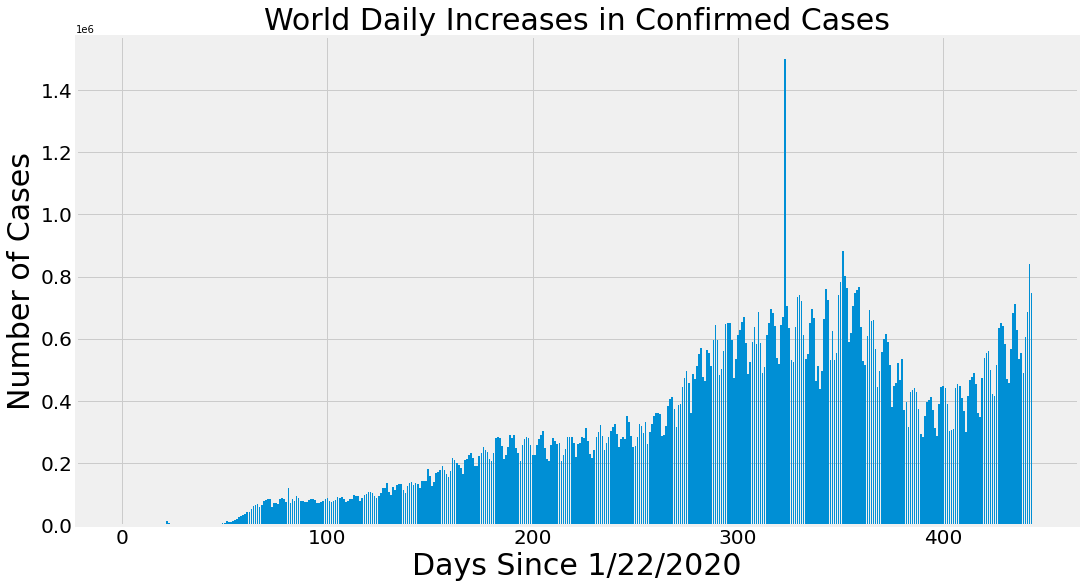

In [506]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

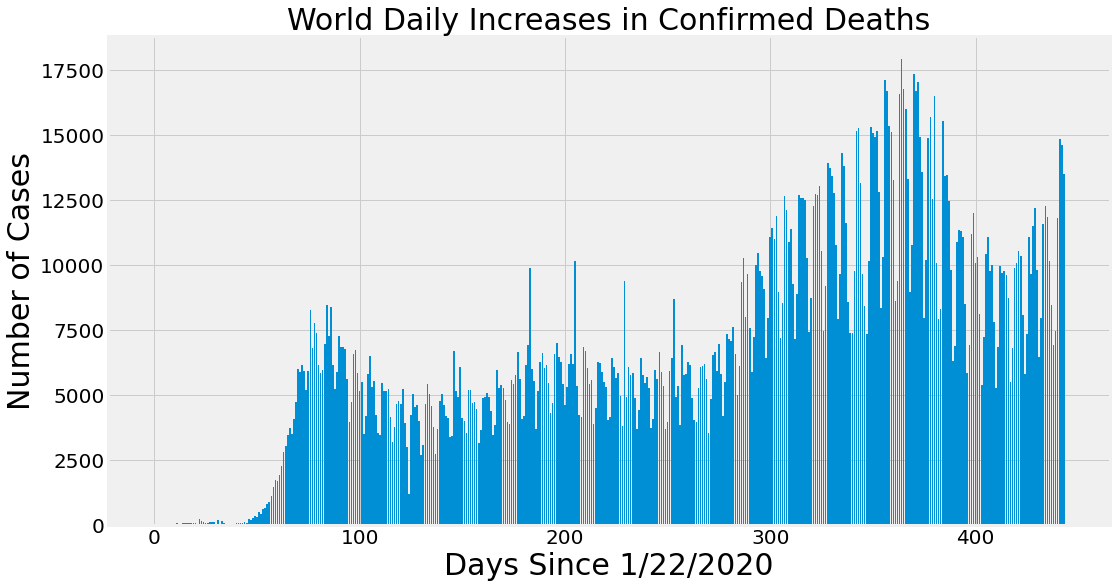

In [507]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

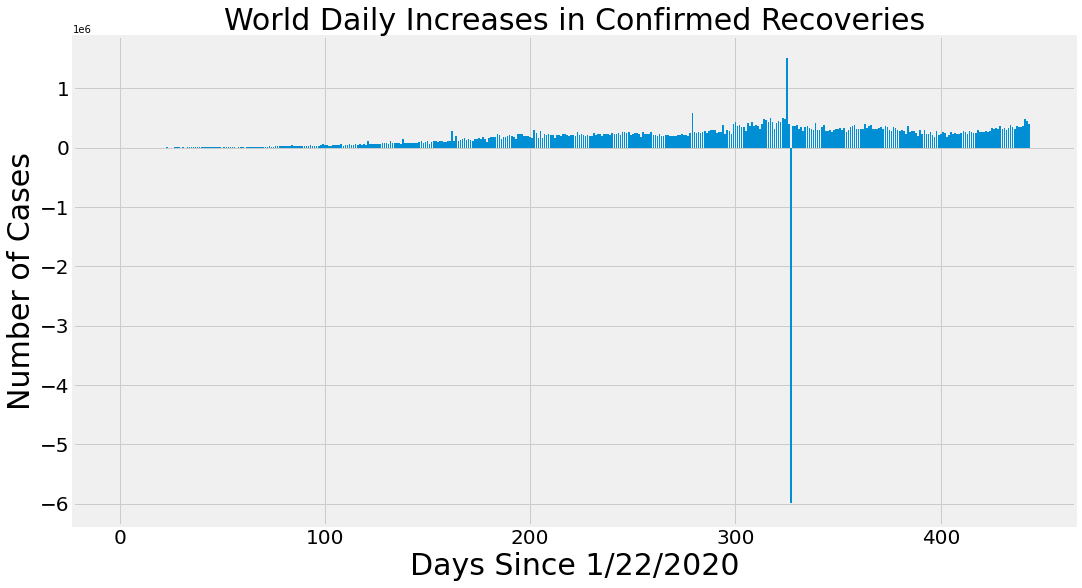

In [508]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#### [ 3.4 ] graph representation of predicted confirm cases

In [509]:
def plot_predictions(x, y, pred, algo_name, color,z):
    plt.figure(figsize=(5, 5))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=15)
    plt.xlabel('Days Since 1/22/2020', size=10)
    plt.ylabel('Number of Cases', size=10)
    plt.legend([z, algo_name], prop={'size': 10})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

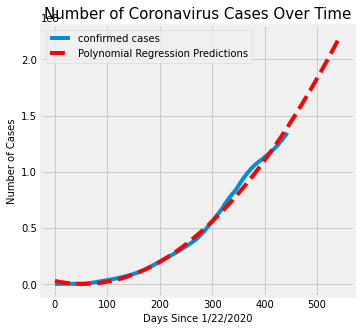

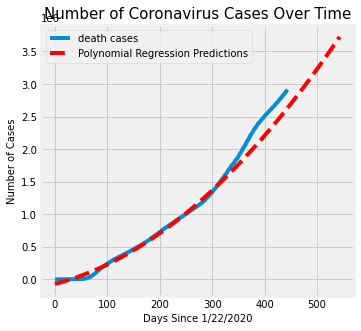

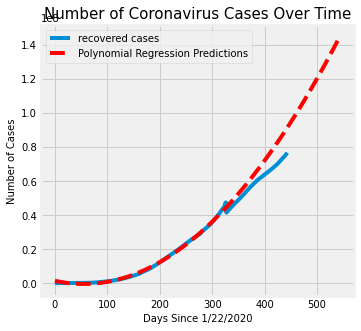

In [510]:
plot_predictions(adjusted_dates, world_cases, c_linear_pred, 'Polynomial Regression Predictions', 'red','confirmed cases')
plot_predictions(adjusted_dates, total_deaths, d_linear_pred, 'Polynomial Regression Predictions', 'red','death cases')
plot_predictions(adjusted_dates, total_recovered, r_linear_pred, 'Polynomial Regression Predictions', 'red','recovered cases')

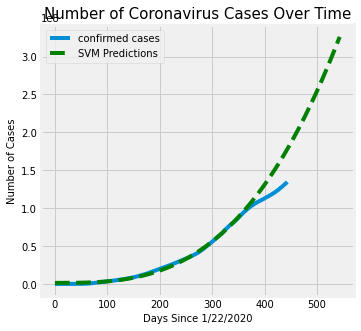

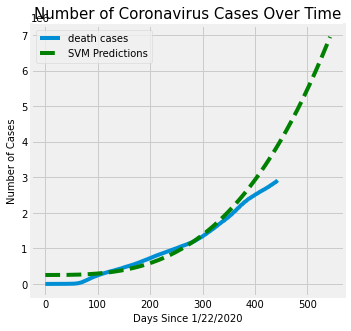

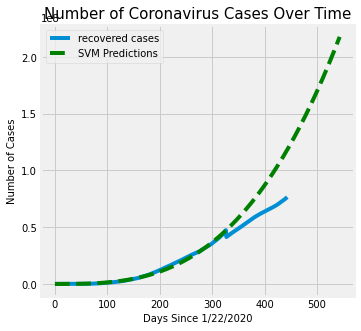

In [511]:
plot_predictions(adjusted_dates, world_cases, c_svm_pred, 'SVM Predictions', 'green','confirmed cases')
plot_predictions(adjusted_dates, total_deaths, d_svm_pred, 'SVM Predictions', 'green','death cases')
plot_predictions(adjusted_dates, total_recovered, r_svm_pred, 'SVM Predictions', 'green','recovered cases')

In [512]:
# Future predictions using polynomial regression
c_linear_pred = c_linear_pred.reshape(1,-1)[0]
d_linear_pred = d_linear_pred.reshape(1,-1)[0]
r_linear_pred = r_linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-100:], 'Predicted number of Confirmed Cases Worldwide': np.round(c_linear_pred[-100:]),'Predicted number of death Cases Worldwide': np.round(d_linear_pred[-100:]),'Predicted number of Recovered Cases Worldwide': np.round(r_linear_pred[-100:])})
poly_df
#3-298201846.0
#2-215351933.0
#1-95750168.0

,Date,Predicted number of Confirmed Cases Worldwide,Predicted number of death Cases Worldwide,Predicted number of Recovered Cases Worldwide
0,04/10/2021,140049342.0,2634985.0,91632124.0
1,04/11/2021,140768148.0,2645096.0,92106536.0
2,04/12/2021,141488793.0,2655225.0,92582166.0
3,04/13/2021,142211278.0,2665372.0,93059014.0
4,04/14/2021,142935601.0,2675538.0,93537080.0
...,...,...,...,...
95,07/14/2021,216548516.0,3676156.0,142139690.0
96,07/15/2021,217442058.0,3687982.0,142729813.0
97,07/16/2021,218337440.0,3699826.0,143321154.0
98,07/17/2021,219234661.0,3711689.0,143913713.0


In [513]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-100:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(c_svm_pred[-100:]),'SVM Predicted # of death Cases Worldwide': np.round(d_svm_pred[-100:]),'SVM Predicted # of Recovered Cases Worldwide': np.round(r_svm_pred[-100:])})
svm_df
#3-320593776.0
#2-35067546.0
#1-11382899.0

,Date,SVM Predicted # of Confirmed Cases Worldwide,SVM Predicted # of death Cases Worldwide,SVM Predicted # of Recovered Cases Worldwide
0,04/10/2021,178866269.0,3914083.0,118978534.0
1,04/11/2021,180068164.0,3938884.0,119784563.0
2,04/12/2021,181275473.0,3963797.0,120594223.0
3,04/13/2021,182488209.0,3988821.0,121407522.0
4,04/14/2021,183706383.0,4013958.0,122224467.0
...,...,...,...,...
95,07/14/2021,318903526.0,6803734.0,212891947.0
96,07/15/2021,320674067.0,6840269.0,214079328.0
97,07/16/2021,322451178.0,6876940.0,215271114.0
98,07/17/2021,324234870.0,6913746.0,216467315.0


### [ 4.0 ] country wise representation

In [514]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

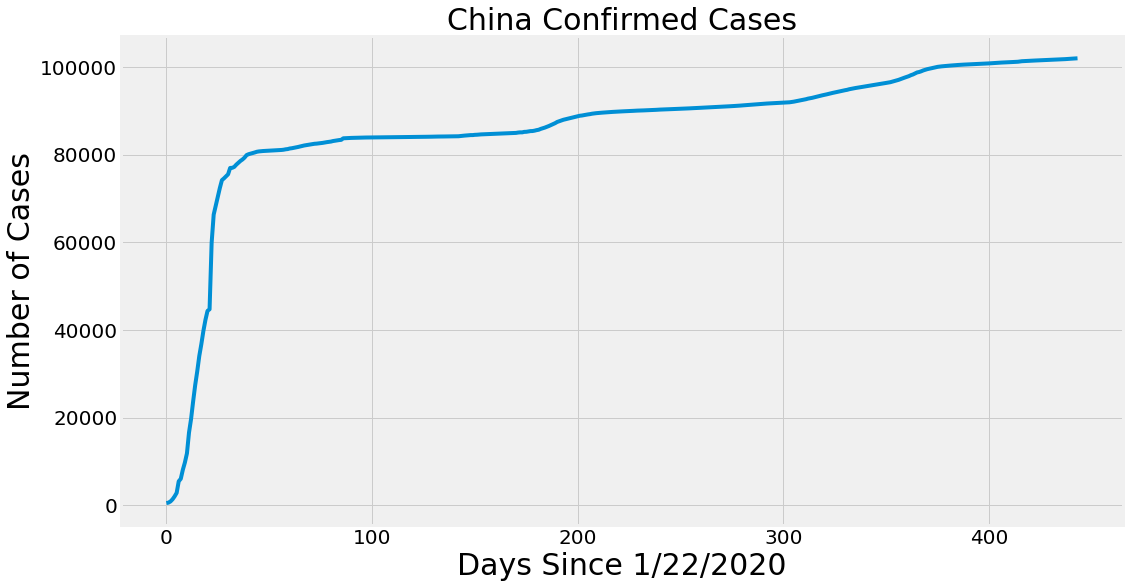

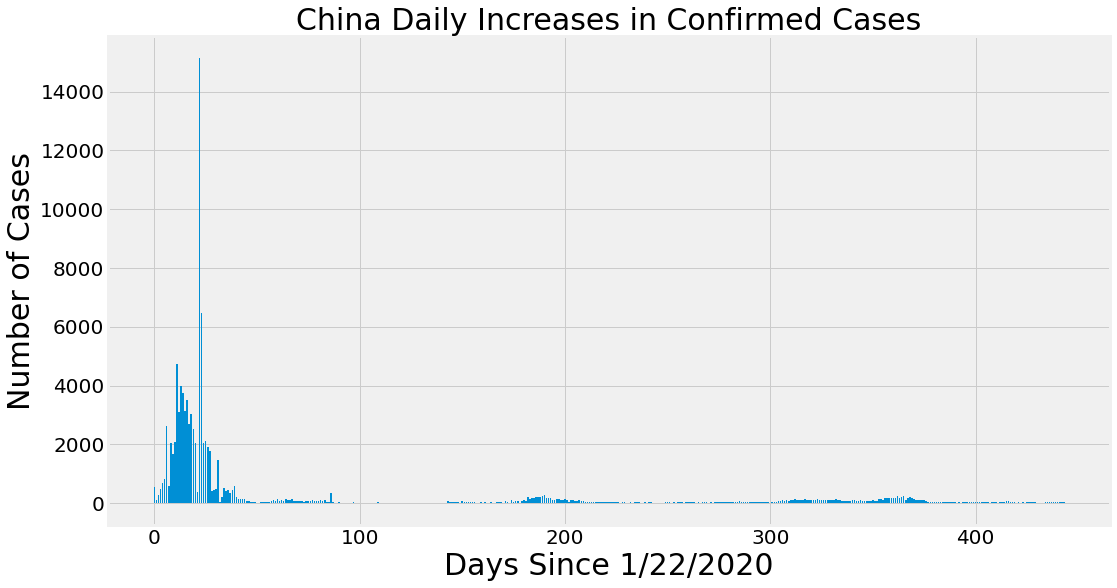

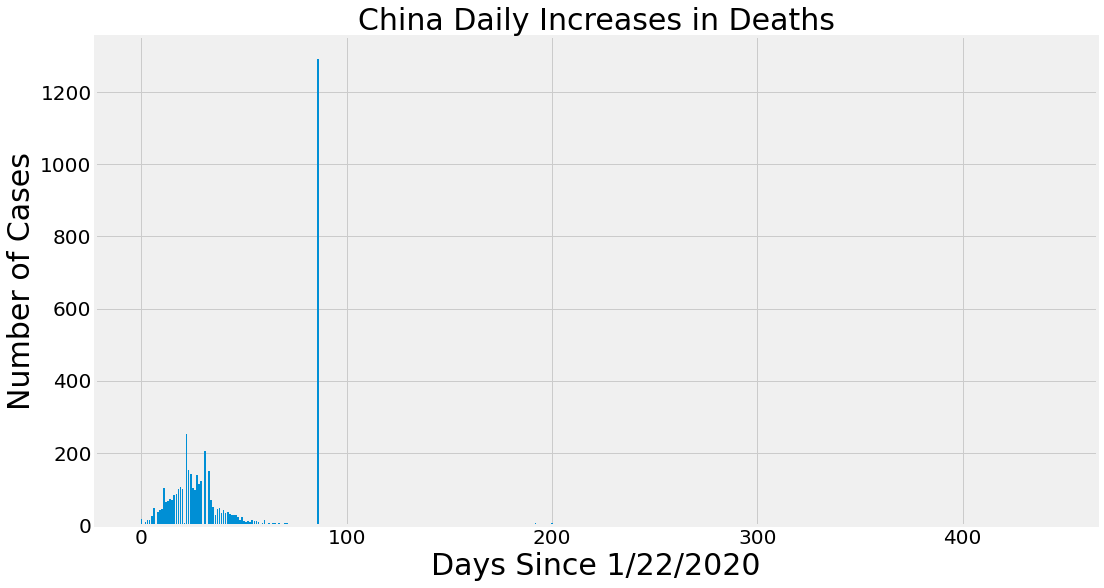

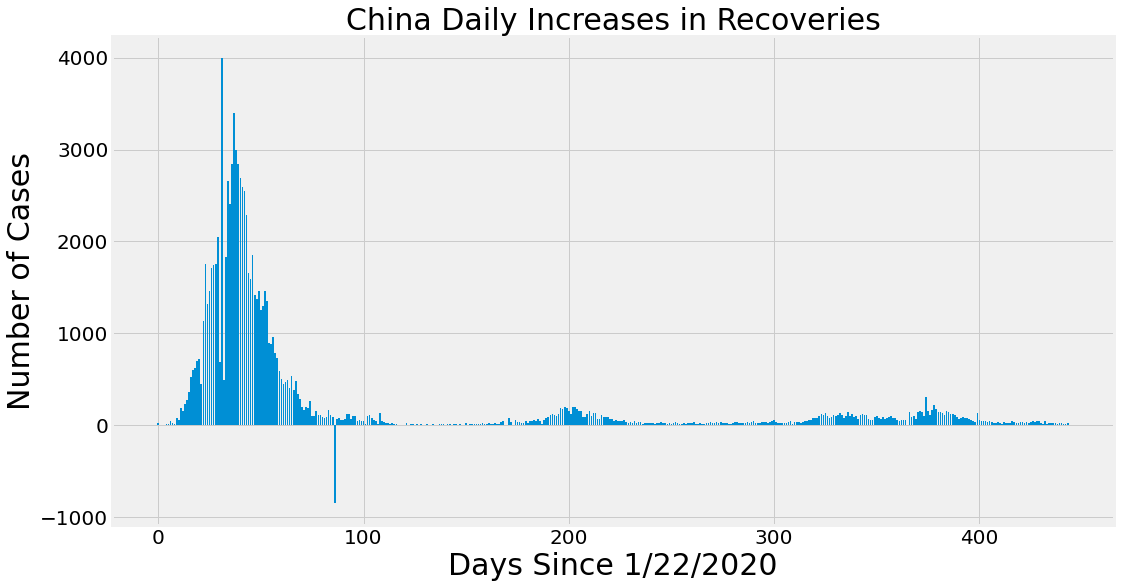

In [515]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

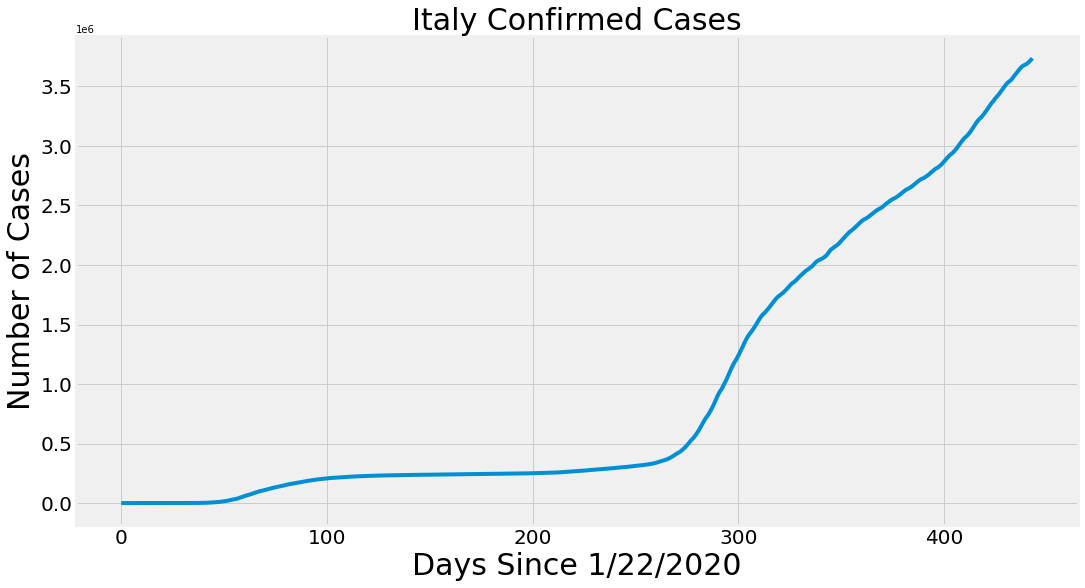

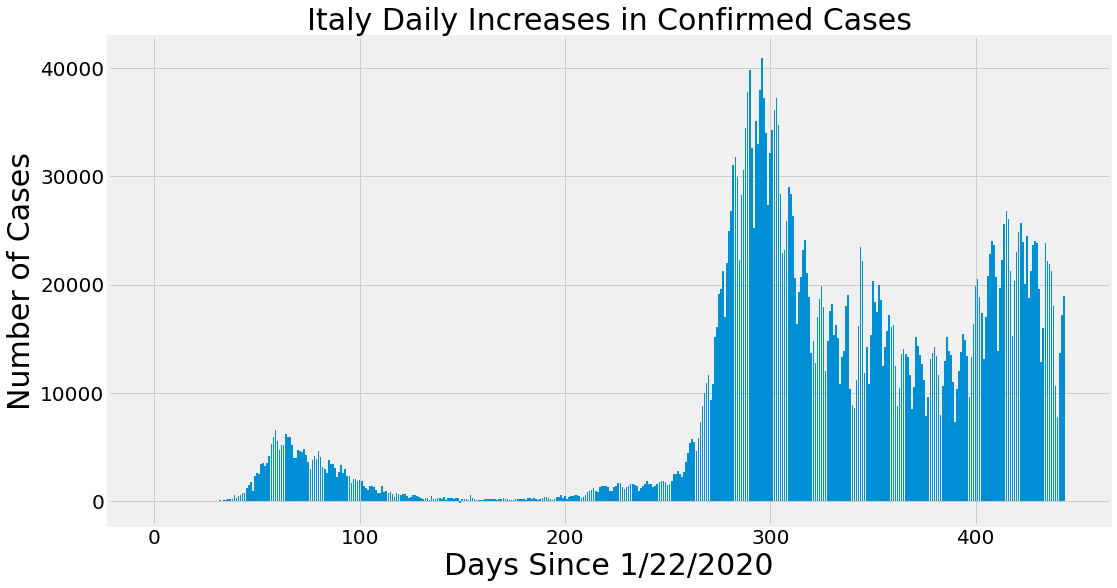

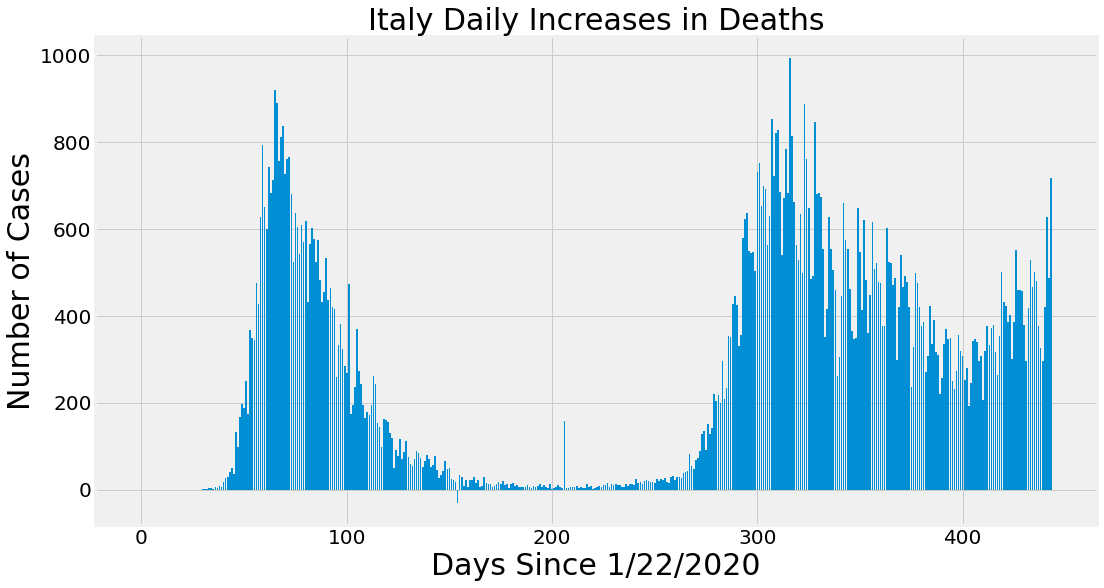

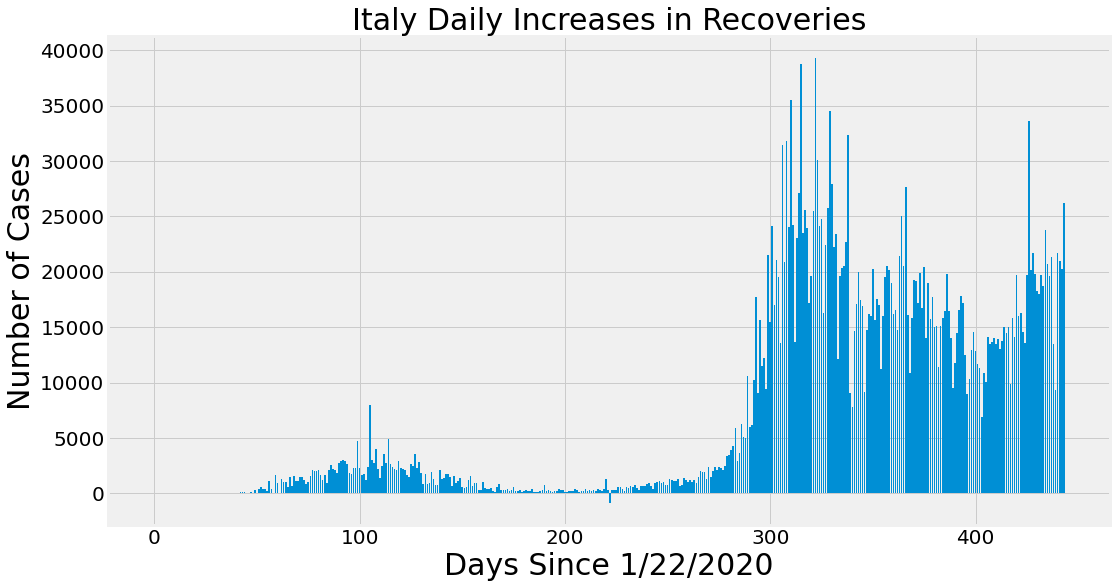

In [516]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

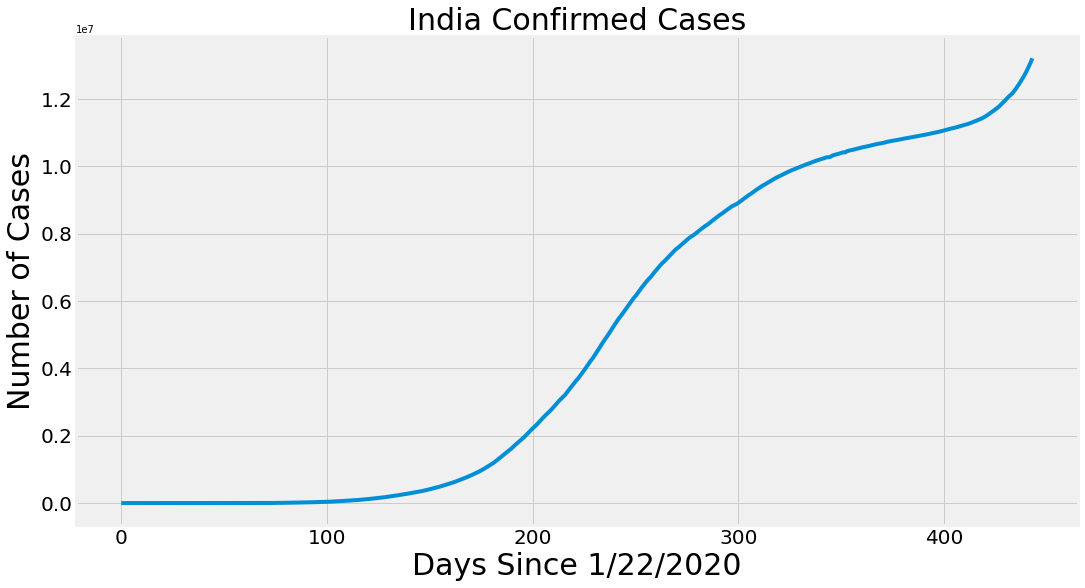

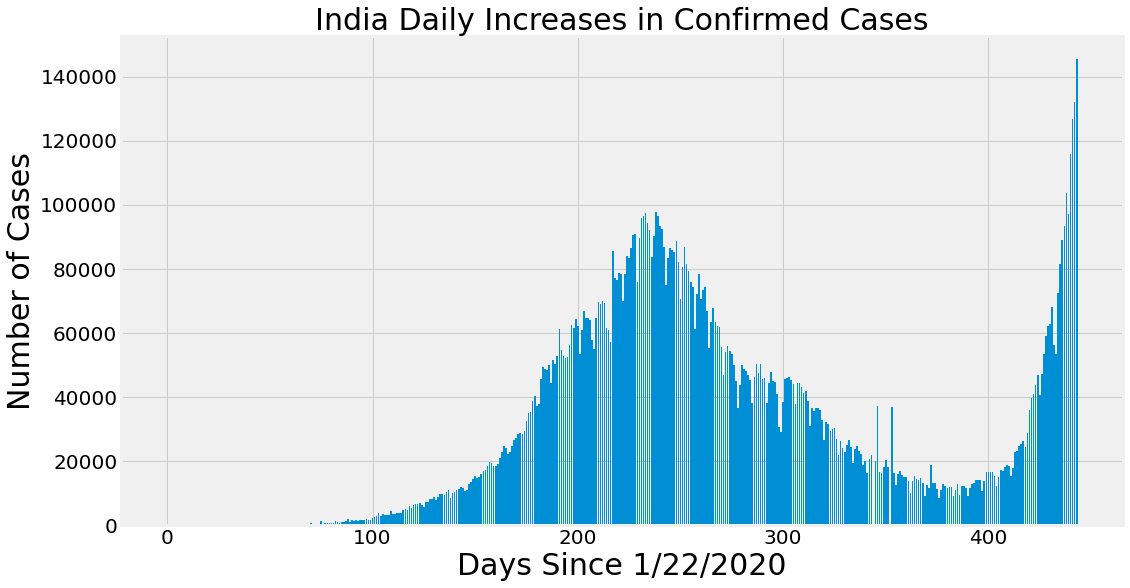

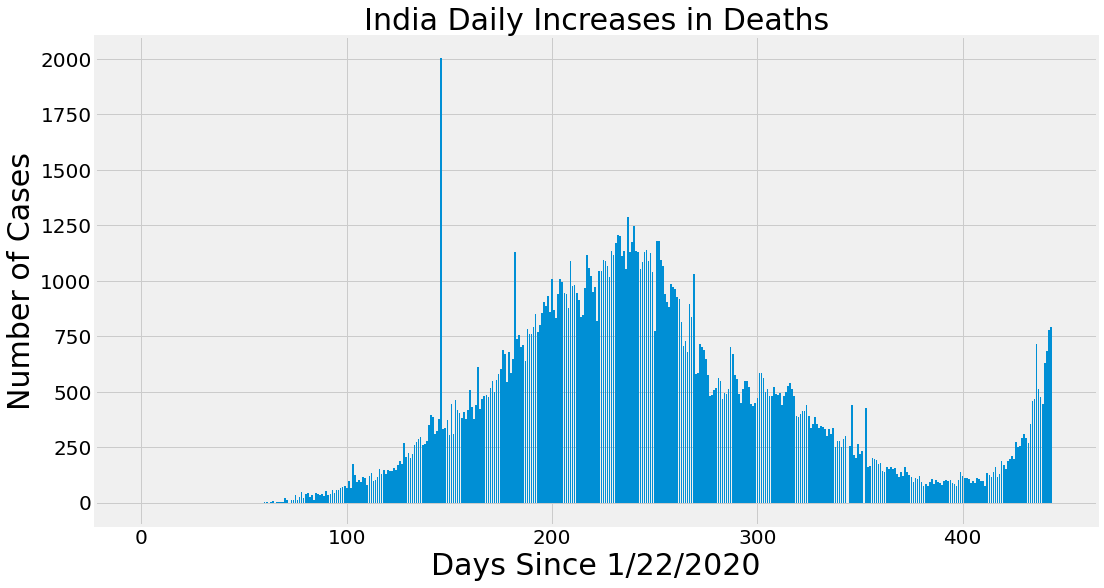

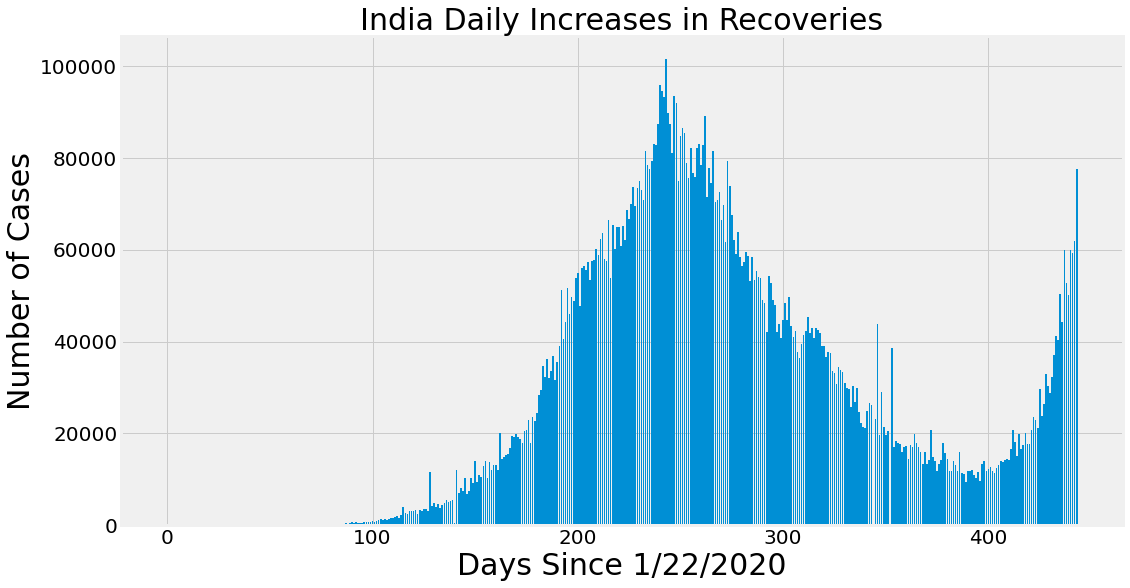

In [517]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

### [ 5.0 ] confirm death recovery for 6 Countries 

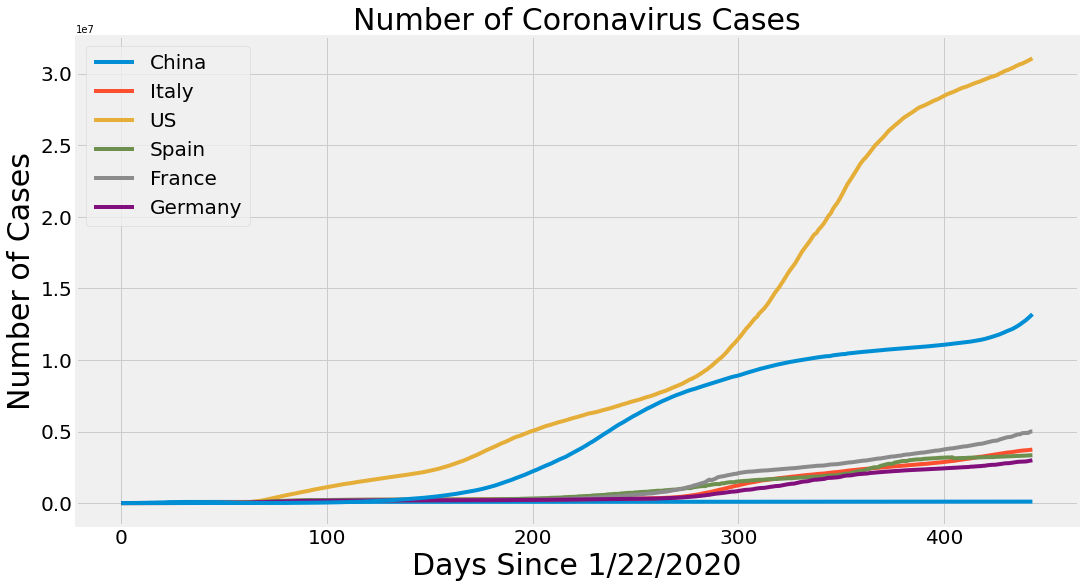

In [518]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

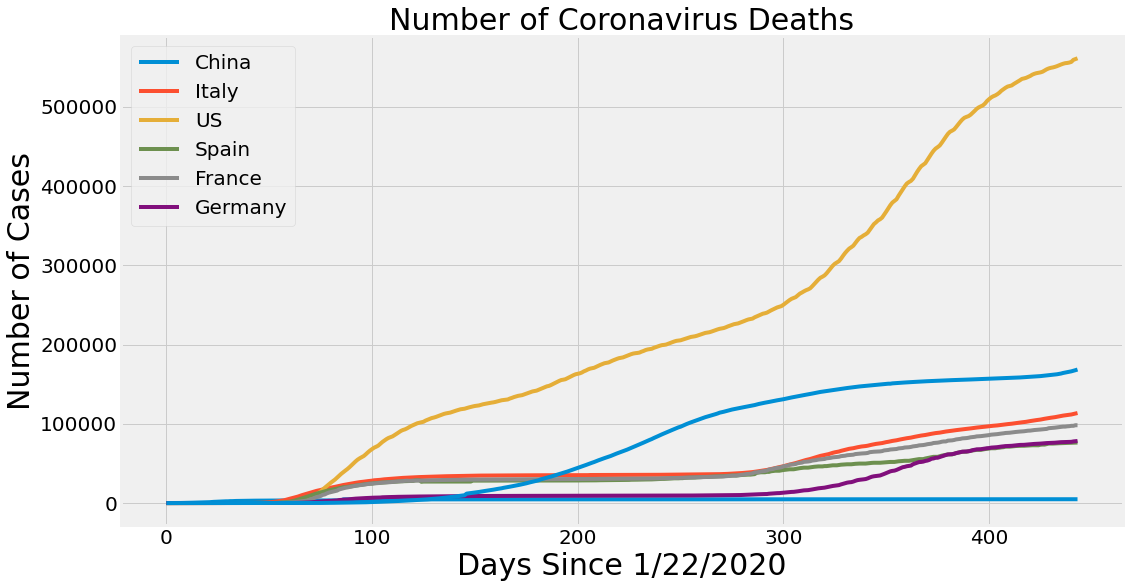

In [519]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

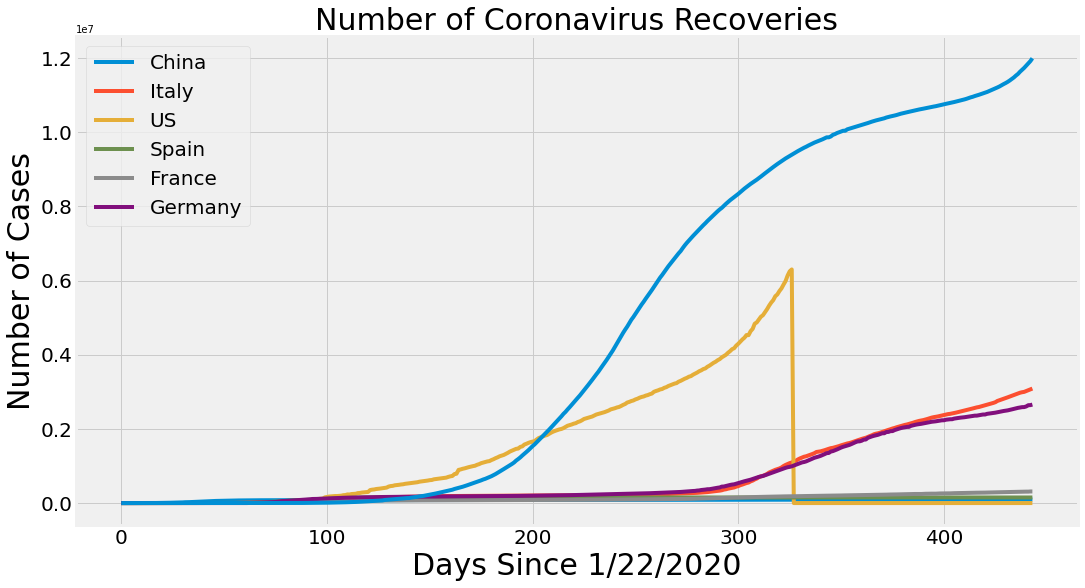

In [520]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### [ 6.0 ] Conclusion

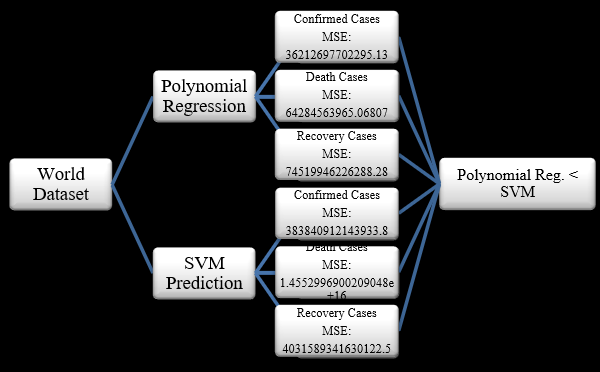

In [521]:

print('MSE from poly reg:',mean_squared_error(c_test_linear_pred, y_test_confirmed))
print('MSE from svm:',mean_squared_error(c_svm_test_pred, y_test_confirmed))

MSE from poly reg: 31653961878460.727
MSE from svm: 433822257807794.9




1.   36212697702295.13
2.   383840912143933.8
 